In [12]:
import pandas as pd
mlb = pd.read_csv("data/mlb.csv")
print(mlb.head())
print(mlb.shape)

              name team       position  height  weight    age
0    Adam_Donachie  BAL        Catcher      74   180.0  22.99
1        Paul_Bako  BAL        Catcher      74   215.0  34.69
2  Ramon_Hernandez  BAL        Catcher      72   210.0  30.78
3     Kevin_Millar  BAL  First_Baseman      72   210.0  35.43
4      Chris_Gomez  BAL  First_Baseman      73   188.0  35.71
(1034, 6)


In [13]:
print(mlb.describe())

            height       weight          age
count  1034.000000  1033.000000  1034.000000
mean     73.697292   201.689255    28.736712
std       2.305818    20.991491     4.320310
min      67.000000   150.000000    20.900000
25%      72.000000   187.000000    25.440000
50%      74.000000   200.000000    27.925000
75%      75.000000   215.000000    31.232500
max      83.000000   290.000000    48.520000


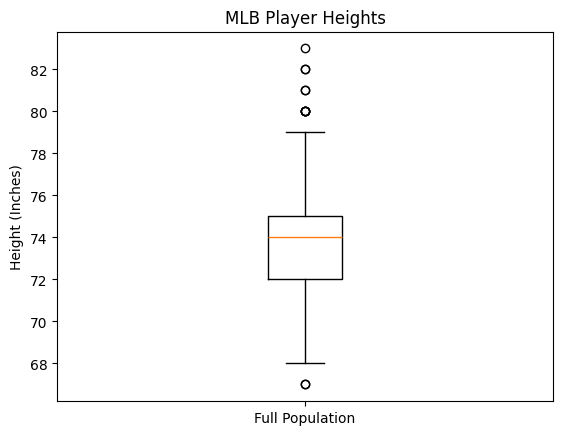

In [14]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.boxplot(mlb['height'])
ax1.set_ylabel("Height (Inches)")
plt.title("MLB Player Heights")
plt.xticks([1], ["Full Population"])
plt.show()

In [15]:
sample1 = mlb.sample(n=30, random_state=8765309)
sample2 = mlb.sample(n=30, random_state=1729)
sample3=[71, 72, 73, 74, 74, 76, 75, 75, 75, 76, 75, 77, 76, 75, 77, 76, 75,76, 76, 75, 75, 81,77, 75, 77, 75, 77, 77, 75, 75]

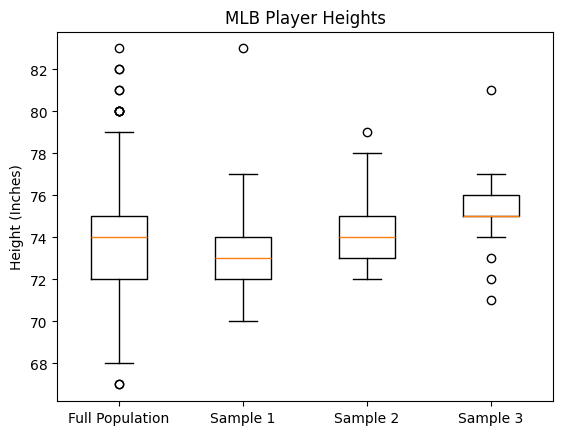

In [16]:
import numpy as np
fig1, ax1 = plt.subplots()
ax1.boxplot([mlb["height"], sample1["height"], sample2["height"], np.array(sample3)])
ax1.set_ylabel("Height (Inches)")
plt.title("MLB Player Heights")
plt.xticks([1, 2, 3, 4], ["Full Population", "Sample 1", "Sample 2", "Sample 3"])
plt.show()

In [17]:
print(np.mean(sample1["height"]))
print(np.mean(sample2["height"]))
print(np.mean(sample3))

73.63333333333334
74.36666666666666
75.43333333333334


In [19]:
all_differences = []
for i in range(1000):
    new_sample1 = mlb.sample(n=30, random_state=i*2)
    new_sample2 = mlb.sample(n=30, random_state=i*2+1)
    all_differences.append(new_sample1["height"].mean() - new_sample2["height"].mean())
print(all_differences[0:10])

[np.float64(0.8333333333333286), np.float64(-0.30000000000001137), np.float64(-0.10000000000000853), np.float64(-0.1666666666666572), np.float64(0.06666666666667709), np.float64(-0.9666666666666686), np.float64(0.7999999999999972), np.float64(0.9333333333333371), np.float64(-0.5333333333333314), np.float64(-0.20000000000000284)]


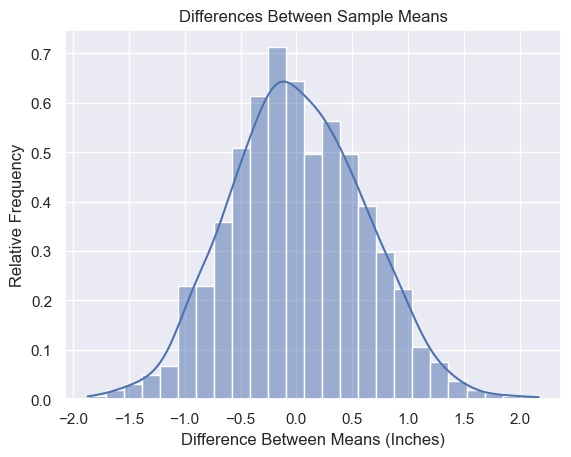

In [21]:
import seaborn as sns
sns.set()
ax=sns.histplot(all_differences, kde=True, stat="density").set_title("Differences Between Sample Means")
plt.xlabel('Difference Between Means (Inches)')
plt.ylabel('Relative Frequency')
plt.show()

In [23]:
large_differences = [diff for diff in all_differences if abs(diff) >=1.6]
print(len(large_differences))

8


In [24]:
small_differences = [diff for diff in all_differences if abs(diff)>= 0.6]
print(len(small_differences))

314


In [25]:
import scipy.stats
scipy.stats.ttest_ind(sample1["height"], sample2["height"])

TtestResult(statistic=np.float64(-1.2836684342066584), pvalue=np.float64(0.20436284155960727), df=np.float64(58.0))

In [26]:
scipy.stats.ttest_ind(sample1["height"], sample3)

TtestResult(statistic=np.float64(-3.1375898894404517), pvalue=np.float64(0.0026763820167194164), df=np.float64(58.0))

In [27]:
scipy.stats.mannwhitneyu(sample1["height"], sample2["height"])

MannwhitneyuResult(statistic=np.float64(330.0), pvalue=np.float64(0.0728684587531095))